# Лабораторная работа 5
О свойствах различных оптимизаторов
1. Смастерить прогнозирующую модель (например из Keras, по-простому, без затей)
2. На имеющихся рядах испытать, задавая разные loss-функции и методы оптимизации
3. Сделать выводы о влиянии функции потерь и оптимизаторов на качество прогноза

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
from keras.losses import MeanSquaredError, MeanAbsoluteError, Huber, LogCosh
from sklearn.preprocessing import MinMaxScaler
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
periodical_df = pd.read_csv('../data/period.csv')[1600:2500]
periodical_df['Moving_Average'] = periodical_df['Temp'].rolling(window=20).mean()
period_ts = periodical_df.Moving_Average.values[20:]
period_ts= MinMaxScaler().fit_transform(period_ts.reshape(-1, 1)).flatten()

Выборка

In [3]:
def generate_random_walk(steps):
    """Случайное блуждание"""
    position = 0
    time_series = [position]
    random.seed(42)
    for _ in range(1,steps):
        step = random.choice([-1, 1])
        position += step
        time_series.append(position)
    return np.array(time_series)

random_ts = generate_random_walk(880)
random_ts= MinMaxScaler().fit_transform(random_ts.reshape(-1, 1)).flatten()

In [4]:
train_size = int(len(random_ts) * 0.8)
train, test = random_ts[0:train_size], random_ts[train_size:len(random_ts)]

In [5]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=1))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [6]:
losses = [MeanSquaredError(), MeanAbsoluteError(), Huber(), LogCosh()]
optimizers = [Adam(), SGD(), RMSprop(), Adagrad()]

In [7]:
# Разделение на обучающий и тестовый наборы
train_size = int(len(random_ts) * 0.8)
train, test = random_ts[0:train_size], random_ts[train_size:len(random_ts)]

# Создание модели
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=1))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Списки функций потерь и оптимизаторов
losses = [MeanSquaredError(), MeanAbsoluteError(), Huber(), LogCosh()]
optimizers = [Adam(), SGD(), RMSprop(), Adagrad()]

# Обучение модели с разными функциями потерь и оптимизаторами
best_loss = float('inf')
best_model = None
best_loss_name = None
best_optim_name = None

for loss in losses:
    for optimizer in optimizers:
        model.compile(loss=loss, optimizer=optimizer)
        history = model.fit(train, train, epochs=50, verbose=0)
        
        # Оценка модели
        test_loss = model.evaluate(test, test, verbose=0)
        if test_loss < best_loss:
            best_loss = test_loss
            best_model = model
            best_loss_name = str(loss)
            best_optim_name = str(optimizer)

print("Лучшая модель имеет loss:", best_loss)
print("Лучшая функция потерь:", best_loss_name)
print("Лучший оптимизатор:", best_optim_name)


Лучшая модель имеет loss: 1.1741437901946483e-06
Лучшая функция потерь: <keras.src.losses.LogCosh object at 0x000001AB2374A430>
Лучший оптимизатор: <keras.src.optimizers.rmsprop.RMSprop object at 0x000001AB23734D00>


In [8]:

# Создание списков для хранения значений ошибок и эпох
train_errors = []
test_errors = []
epochs = []

# Задание количества эпох для обучения
num_epochs = 50

# Обучение модели и запись значений ошибок на каждой эпохе
for epoch in range(num_epochs):
    model.fit(train, train, epochs=1, verbose=0)
    
    # Оценка модели на обучающем и тестовом наборах данных
    train_loss = model.evaluate(train, train, verbose=0)
    test_loss = model.evaluate(test, test, verbose=0)
    
    # Добавление значений ошибок и номеров эпохи в списки
    train_errors.append(train_loss)
    test_errors.append(test_loss)
    epochs.append(epoch + 1)


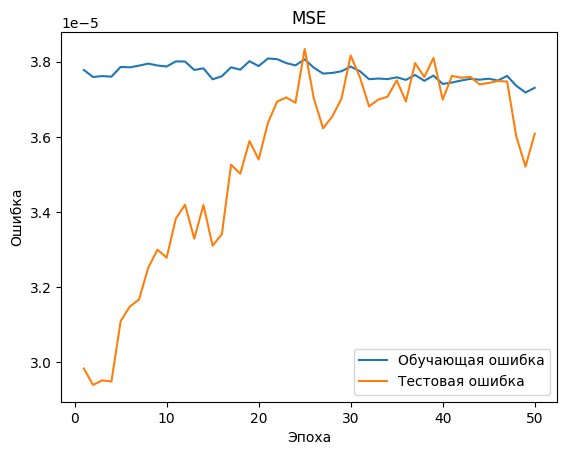

In [9]:
# Построение графиков ошибок по эпохам
plt.title('MSE')
plt.plot(epochs, train_errors, label='Обучающая ошибка')
plt.plot(epochs, test_errors, label='Тестовая ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()